In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from IPython.core.display import HTML
from ipywidgets import interactive

# Modelo XY

se fija el tamaño de la cadena en $L=1001$.

In [2]:
L=10001
Gamma=0.5
Lambda=0.5
a_0=Lambda
a_1=0.5*(1-Gamma)
a_2=0.5*(1+Gamma)

Definimos entonces la matriz de covarianzas, la cual es una matriz como por bloques en donde cada bloque tiene los elementos:
$$A_{i}=\begin{pmatrix}
\lambda & \frac{1-\gamma}{2}\\
\frac{1+\gamma}{2} & \lambda
\end{pmatrix},$$
y en sus esquinas se tiene el valor $\frac{1-\gamma}{2}$ para la esquina inferior y $\frac{1+\gamma}{2}$ para la esquina superios, así la matriz de covarianzas total se puede escribir como:
$$A=\begin{pmatrix}
\lambda & \frac{1-\gamma}{2} & 0 &0 &\ldots  &0 &\frac{1+\gamma}{2}\\
\frac{1+\gamma}{2} & \lambda & \frac{1-\gamma}{2} & 0 &\ldots &0 &0\\
0 & \frac{1+\gamma}{2} & \lambda & \frac{1-\gamma}{2} &\ldots &0 &0\\
\vdots& \ddots & \ddots & \ddots & \ldots &  \vdots & \vdots\\
\frac{1-\gamma}{2}&0&0&0&\ldots & \frac{1+\gamma}{2} & \lambda
\end{pmatrix},$$

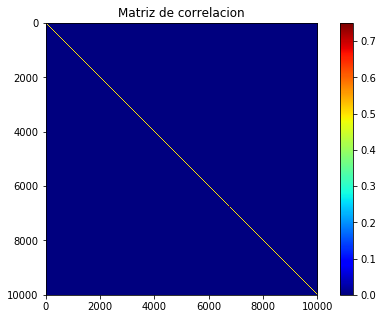

In [3]:
A=np.zeros((L,L))
for i in range(L):
    for j in range(L):
        if i==j:
            A[i,j] = a_0
        elif (i-j) % L == 1:
            A[i,j] = a_2
        elif (j-i) % L == 1:
            A[i,j] = a_1
plt.figure(figsize=(8,5))
plt.imshow(A,cmap=plt.cm.jet)
plt.colorbar()
plt.title("Matriz de correlacion")
plt.show()

# Frecuencias 
Al considerar condiciones periodicas, se puede hacer una transformada de Fourier a los operadores de mayorana $\gamma_k$ tal que (para una cadena de N sitios, se indentifica entonces el primer sitio con el $N$)

$$b_l=\frac{1}{\sqrt{N}}\sum_{k}^{N-1}e^{-i\theta_{l}k}\gamma_{k}\ ; \quad \theta_{l}=\frac{2\pi}{N}l $$
$$\gamma_{k}=\left(\prod_{m<k}\sigma^{z}_{m}\right)\sigma^{-}_{k};\quad\sigma^{-}_{k}=\frac{\sigma_{k}^{x}-i\sigma_{k}^{y}}{2}$$
$$\{ \gamma_{k}^{\dagger},\gamma_{l}^{\dagger}\}=\{\gamma_{k},\gamma_{l}\}=0, \quad \{\gamma_{k}^{\dagger},\gamma_{l}\}=\delta_{kl}$$

Así el Hamiltoniano queda escrito como (Antes):
$$H_{XY}^{(N)}=\frac{1}{2}\sum_{k=0}^{N-1}\left[\left(\gamma_{k+1}^{\dagger}\gamma_{k}+h.c\right)+\gamma\left(\gamma_{k}^{\dagger}\gamma_{k+1}^{\dagger}+h.c\right)\right]-\lambda\sum_{k=0}^{N-1}\gamma_{k}^{\dagger}\gamma_{k}$$
(despues de la tranformada de fourirer, escrita en forma explicita (parte real y compleja)):
$$H_{XY}=\sum_{l=-(N-1)/2}^{(N-1)/2}\left(-\lambda + \cos\theta_{l}\right)b_{l}^{\dagger}b_{l}+\frac{i\gamma}{2}\sum_{l=-(N-1)/2}^{(N-1)/2}\sin\theta_{l}(b_{l}b_{-l}+h.c),$$
entonces:
$$\alpha(\theta)=(\lambda-\cos\theta)$$
$$\beta(\theta)=-\gamma\sin\theta$$
$$\omega(\theta)=\sqrt{\alpha(\theta)^{2}+\beta(\theta)^{2}}$$

In [4]:
def alpha(Gamma,Lambda,theta):
    a_0=Lambda
    a_1=0.5*(1-Gamma)
    a_2=0.5*(1+Gamma)
    return a_0+(a_2+a_1)*np.cos(theta)
def beta(Gamma,Lambda,theta):
    a_1=0.5*(1-Gamma)
    a_2=0.5*(1+Gamma)
    return (a_1-a_2)*np.sin(theta)
def omega(Gamma,Lambda,theta):
    return np.sqrt(alpha(Gamma,Lambda,theta)**2 + beta(Gamma,Lambda,theta)**2)

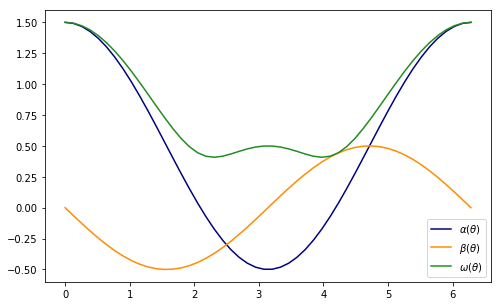

In [5]:
plt.figure(figsize=(8,5))
x=np.linspace(0,2*np.pi)
plt.plot(x,alpha(Gamma,Lambda,x),label=r"$\alpha(\theta)$",color="navy")
plt.plot(x,beta(Gamma,Lambda,x),label=r"$\beta(\theta)$",color="darkorange")
plt.plot(x,omega(Gamma,Lambda,x),label=r"$\omega(\theta)$",color="forestgreen")
plt.legend()
plt.savefig("Energias.pdf")
plt.show()

In [6]:
def Energias(Gamma,Lambda):
    plt.figure(figsize=(8,5))
    x=np.linspace(0,2*np.pi)
    plt.plot(x,alpha(Gamma,Lambda,x),label=r"$\alpha(\theta)$",color="navy")
    plt.plot(x,beta(Gamma,Lambda,x),label=r"$\beta(\theta)$",color="darkorange")
    plt.plot(x,omega(Gamma,Lambda,x),label=r"$\omega(\theta)$",color="forestgreen")
    plt.legend()
    plt.show()

interactive_plot = interactive(Energias, Gamma=(-5.0, 5.0), Lambda=(-5.0, 5.0))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='Gamma', max=5.0, min=-5.0), FloatSlider(value=0.0, d…

# Matriz $\hat{B}$
B no esta normalizada y Bhat está normalizada por las energías, si sólo lo hago con B no diagonaliza. B tiene que ver con el corte sobre los $\theta$ en el intervalo [$0,\pi$], lo cual conlleva a tener un equivalente a matrices de $2X2$ de seno y coseno.

In [7]:
def sub_B(Gamma,Lambda,L,theta):
    b=np.array([[alpha(Gamma,Lambda,2.0*np.pi*theta/L)
                 ,-beta(Gamma,Lambda,2.0*np.pi*theta/L)],
                [beta(Gamma,Lambda,2.0*np.pi*theta/L),
                alpha(Gamma,Lambda,2.0*np.pi*theta/L)]])
    return b

Se necesita dividir por las energías si no, no se puede asegurar que $O_1$ sea una matriz ortogonal. por que la matriz con la que se llena no sólo es de senos y cosenos.

In [8]:
B=np.zeros((L,L))
B[0,0]=alpha(Gamma,Lambda,0)/omega(Gamma,Lambda,0)
B[L-1,L-1]=alpha(Gamma,Lambda,np.pi)/omega(Gamma,Lambda,np.pi)

In [9]:
for i in range(1,L//2):
    B[2*i-1:1+2*i,2*i-1:1+2*i]=sub_B(Gamma,Lambda,L,i)/omega(Gamma,Lambda,2.0*np.pi*i/L)

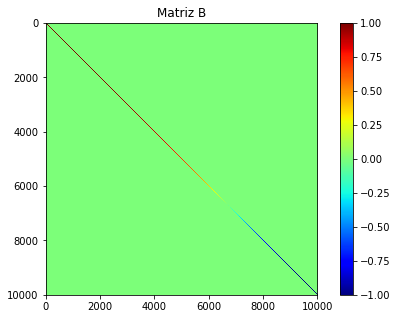

In [10]:
plt.figure(figsize=(8,5))
plt.imshow(B,cmap=plt.cm.jet)
plt.colorbar()
plt.title("Matriz B")
plt.show()

# <center>Fourier</center> 
La idea es encontrar un par de matrices $O_1$ y $O_2$ tales que 

$$ O_1 A O_2 = A_{D}, \quad \text{con}\quad A_{D}=\text{diag}(\lambda_{k})$$

estas $O_1$ y $O_2$ son posibles encontrarlas por medio de una tranformación de Fourier.

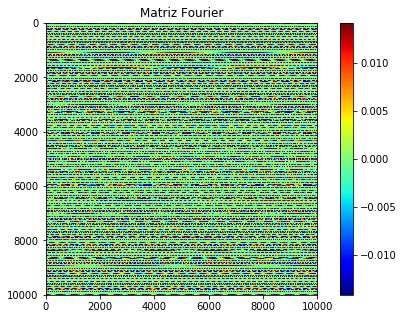

In [11]:
Matrix_Fourier=np.zeros((L,L))
for i in range(0,L,2):
    for j in range(L):
        if i >0:
            Matrix_Fourier[i,j]=np.sqrt(2.0/L)*np.cos(np.pi*i*j/L)
        else:
            Matrix_Fourier[i,j]=np.sqrt(1.0/L)*np.cos(np.pi*i*j/L)
plt.figure(figsize=(8,5))
plt.imshow(Matrix_Fourier,cmap=plt.cm.jet)
plt.colorbar()
plt.title("Matriz Fourier")
plt.show()
for i in range(0,L,2):
    for j in range(L):
        if i < L-2:
            Matrix_Fourier[i+1,j]=np.sqrt(2.0/L)*np.sin(2.0*np.pi*(i/2.0+1.0)*j/L)
        else:
            Matrix_Fourier[L-1,j]=np.sqrt(1.0/L)*np.cos(np.pi*j)

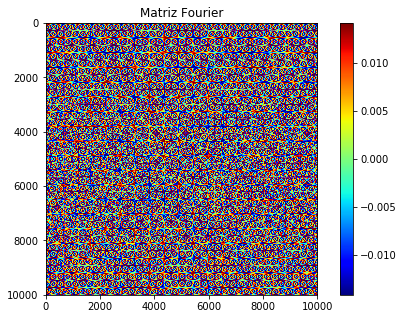

In [12]:
plt.figure(figsize=(8,5))
plt.imshow(Matrix_Fourier,cmap=plt.cm.jet)
plt.colorbar()
plt.title("Matriz Fourier")
plt.show()

# Transformacion completa

In [13]:
O_1=np.matmul(B.T,Matrix_Fourier)
O_2=Matrix_Fourier.T

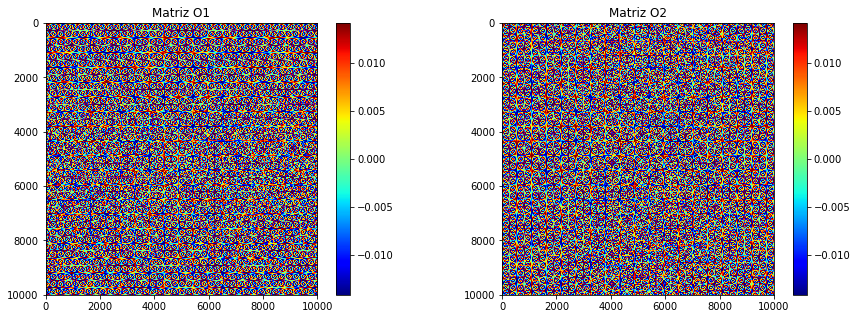

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(O_1,cmap=plt.cm.jet)
plt.colorbar()
plt.title("Matriz O1")
plt.subplot(1,2,2)
plt.imshow(O_2,cmap=plt.cm.jet)
plt.colorbar()
plt.title("Matriz O2")
plt.show()

In [15]:
diag=O_1@A@O_2

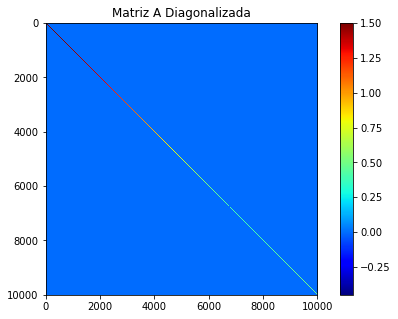

In [16]:
plt.figure(figsize=(8,5))
plt.imshow(diag,cmap=plt.cm.jet)
plt.colorbar()
plt.title("Matriz A Diagonalizada")
plt.show()

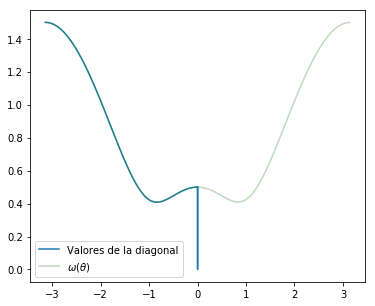

In [17]:
plt.figure(figsize=(6,5))
plt.plot(np.linspace(0,np.pi,len(np.diagonal(diag)))-np.pi,np.diagonal(diag),label="Valores de la diagonal")
plt.plot(x-np.pi,omega(Gamma,Lambda,x),label=r"$\omega(\theta)$",color="forestgreen",alpha=0.3)
plt.legend()
plt.show()

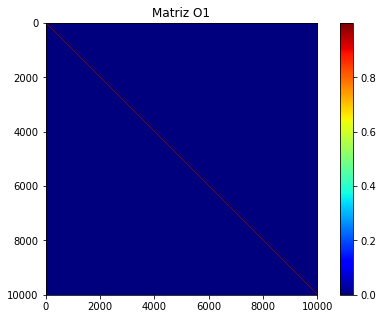

In [18]:
plt.figure(figsize=(8,5))
plt.imshow(O_1.T@O_1,cmap=plt.cm.jet)
plt.colorbar()
plt.title("Matriz O1")
plt.show()

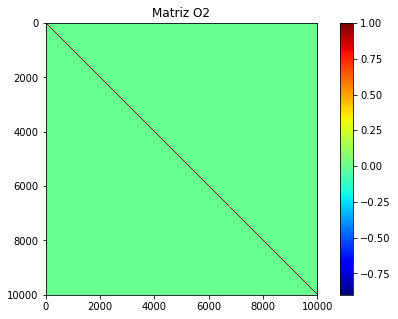

In [19]:
plt.figure(figsize=(8,5))
plt.imshow(O_2.T@O_2,cmap=plt.cm.jet)
plt.colorbar()
plt.title("Matriz O2")
plt.show()